# The Logistic Map

In [1]:
using Plots

The logistic map is defined as

$$
    x_{n+1} = r x_n (1-x_n)
$$

With $x_n \in [0, 1]$, $r\in[0,4]$

In [2]:
logistic_map(x, r) = r * x * (1 - x)

logistic_map (generic function with 1 method)

In [4]:
x, r = 0.7, 3.83
n_rounds = 125
x_vals = zeros(n_rounds)
x_vals[begin] = x
for n=2:n_rounds
    x = logistic_map(x, r)
    x_vals[n] = x
end

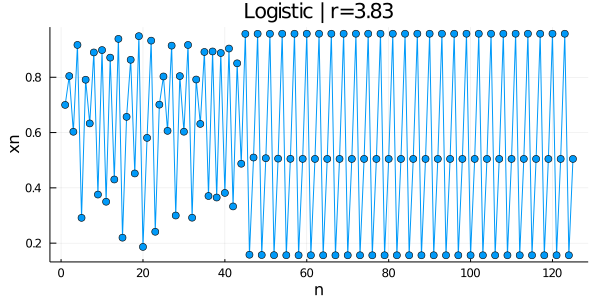

In [19]:
plot(x_vals, marker=true, legend=nothing, xlabel="n", ylabel="xn", size=(600, 300))
plot!(title="Logistic | r=$r")

## Bifurcation diagram

In [20]:
function logistic_hist(x0, r, n_iterations=500)
    x_vals = zeros(n_iterations)
    x_vals[begin] = x0
    x = x0
    for n=2:n_iterations
        x = logistic_map(x, r)
        x_vals[n] = x
    end
    
    return x_vals
end

logistic_hist (generic function with 2 methods)

In [213]:
r_vals = 0.8:0.01:4

iterated_values = zeros(0)
iterated_r_values = zeros(0)

x0 = 0.5
for r in r_vals
    iterated_r = unique(round.(logistic_hist(x0, r, 100_000)[end-100:end], digits=5))
    n_unique = size(iterated_r)
    append!(iterated_values, iterated_r)
    append!(iterated_r_values, ones(n_unique) .* r)
end

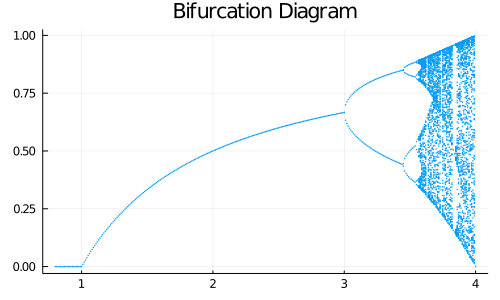

In [214]:
plot(title="Bifurcation Diagram")
scatter!(iterated_r_values, iterated_values, markersize=1, markerstrokewidth=0, size=(500, 300), label=nothing)

### Animating the bifurcation

In [ ]:
n_rvals= size(iterated_r_values)[1]

init_r_array = Array{Bool}(undef, 1)
for n=1:n_rvals
    if n == 1
        append!(init_r_array, true)
    elseif iterated_r_values[n-1] == iterated_r_values[n]
        append!(init_r_array, false)
    else
        append!(init_r_array, true)
    end
end
init_r_array[end-100:end] .= true;

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/tmp.gif")
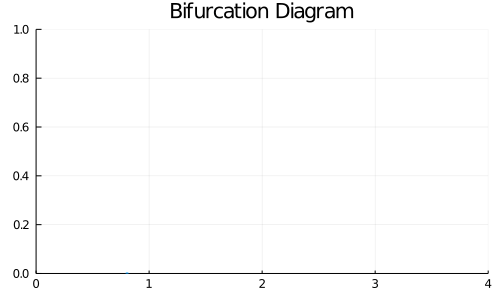

In [221]:
@gif for n=1:n_rvals
    plot(title="Bifurcation Diagram")
    scatter!(iterated_r_values[begin:n], iterated_values[begin:n],
                markersize=2,
                markerstrokewidth=0,
                label=nothing,
                size=(500, 300),
                ylim=(0, 1), xlim=(0, 4))
end when init_r_array[n]